In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_projection_benchmark, get_test_df_creation_str, get_test_projection_str
import matplotlib
import statistics

from mlinspect.utils import get_project_root

In [12]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #major_ticks = np.arange(0, 10, 3)
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
def plot_runtimes_both(run_row_numbers, orig_times, mlinspect_times, title_and_path, save_to_file=False):

    # Data for plotting
    np_times_no_mlinspect = np.array(orig_times)
    np_times_mlinspect = np.array(mlinspect_times)
    

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    ax.plot(np_times_no_mlinspect, marker='o', color='black', linewidth=2, linestyle=':', label="Original", markersize=3)
    ax.plot(np_times_mlinspect, marker='o', color='black', linewidth=2, linestyle='-', label="mlinspect", markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

In [8]:
row_numbers = [10, 100, 1000, 10000, 100000, 1000000]

no_mlinspect = []
one_mlinspect = []

for row_number in row_numbers:
    benchmark_result_no_mlinspect, benchmark_result_one_inspection = do_projection_benchmark(row_number)
    no_mlinspect.append(statistics.mean(benchmark_result_no_mlinspect))
    one_mlinspect.append(statistics.mean(benchmark_result_one_inspection))
    print("Done: {}".format(row_number))

print("no_mlinspect: {}".format(no_mlinspect))
print("one_mlinspect: {}".format(one_mlinspect))

Done: 10
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no_mlinspect: [0.0007222594499992852, 0.0005356740000010518, 0.0005100928499999213, 0.0005065010999999231, 0.0008945796500015035, 0.003483489349996205]
one_mlinspect: [0.0024176925500015043, 0.0021765880500026922, 0.002132623800000033, 0.00247349079999708, 0.002822263550000059, 0.005699945150001895]


no mlinspect


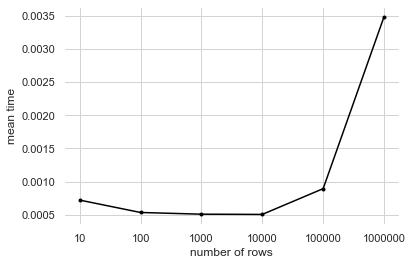

mlinspect


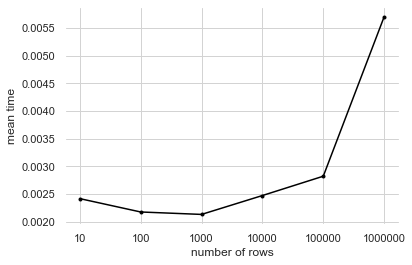

Both


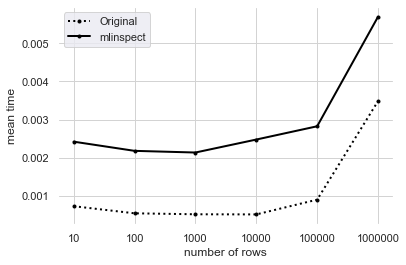

In [13]:
print('no mlinspect')
plot_runtimes(row_numbers, no_mlinspect, 'no_mlinspect')

print('mlinspect')
plot_runtimes(row_numbers, one_mlinspect, 'mlinspect')

print('Both')
plot_runtimes_both(row_numbers, no_mlinspect, one_mlinspect, 'Both')